In [757]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/srh-vs-kxip-match/matches.csv
/kaggle/input/srh-vs-kxip-match/deliveries.csv


In [758]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("../input/srh-vs-kxip-match/deliveries.csv")
df.head()
df.info()
import os
print(os.listdir("../input"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [759]:
df1=pd.read_csv("../input/srh-vs-kxip-match/matches.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# QUES 1

In [760]:
df2=df1[['id','team1','team2','winner','result','toss_winner','toss_decision','season',]]
df2.head()


,id,team1,team2,winner,result,toss_winner,toss_decision,season
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,normal,Royal Challengers Bangalore,field,2017
1,2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,normal,Rising Pune Supergiant,field,2017
2,3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,normal,Kolkata Knight Riders,field,2017
3,4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,normal,Kings XI Punjab,field,2017
4,5,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,normal,Royal Challengers Bangalore,bat,2017


In [761]:
df3 = df2[(df2['team1']=='Sunrisers Hyderabad') & (df2['team2'] == 'Kings XI Punjab') | (df2['team1']=='Kings XI Punjab') & (df2['team2'] == 'Sunrisers Hyderabad')]
df3



,id,team1,team2,winner,result,toss_winner,toss_decision,season
18,19,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,normal,Kings XI Punjab,field,2017
31,32,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,normal,Kings XI Punjab,field,2017
404,405,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,normal,Kings XI Punjab,bat,2013
439,440,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,normal,Kings XI Punjab,field,2013
465,466,Kings XI Punjab,Sunrisers Hyderabad,Kings XI Punjab,normal,Sunrisers Hyderabad,field,2014
495,496,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,normal,Kings XI Punjab,field,2014
543,544,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,normal,Kings XI Punjab,field,2015
563,564,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,normal,Sunrisers Hyderabad,bat,2015
593,594,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,normal,Sunrisers Hyderabad,field,2016
621,622,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,normal,Kings XI Punjab,bat,2016


In [762]:
df3['winner'].value_counts()


Sunrisers Hyderabad    10
Kings XI Punjab         4
Name: winner, dtype: int64

In [763]:
total_matches=df3['id'].nunique()
total_matches

14

Text(0, 10, '10')

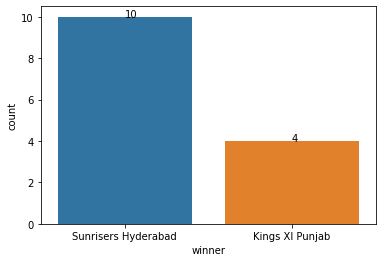

In [764]:
sns.countplot(df3['winner'])

plt.text(1,4,str(4))
plt.text(0,10,str(10))

In [765]:
df3['toss_decision'].value_counts()

field    10
bat       4
Name: toss_decision, dtype: int64

In [766]:
matches_played=pd.concat([df1['team1'],df1['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=df1['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)
matches_played.reset_index().head(8)


,Team,Total Matches,wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Delhi Capitals,177,84
4,Kings XI Punjab,176,82
5,Chennai Super Kings,164,77
6,Rajasthan Royals,147,75
7,Sunrisers Hyderabad,108,58


In [767]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage.head(8)

Team
Mumbai Indians                 58.3
Royal Challengers Bangalore    55.6
Kolkata Knight Riders          51.7
Delhi Capitals                 47.5
Kings XI Punjab                46.6
Chennai Super Kings            47.0
Rajasthan Royals               51.0
Sunrisers Hyderabad            53.7
dtype: float64

In [768]:
total=df1.groupby('team1')['id'].count() + df1.groupby('team2')['id'].count()
total

team1
Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                 177
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
Name: id, dtype: int64

Text(0.5, 1.0, 'WIN PERCENTAGE BY TEAMS')

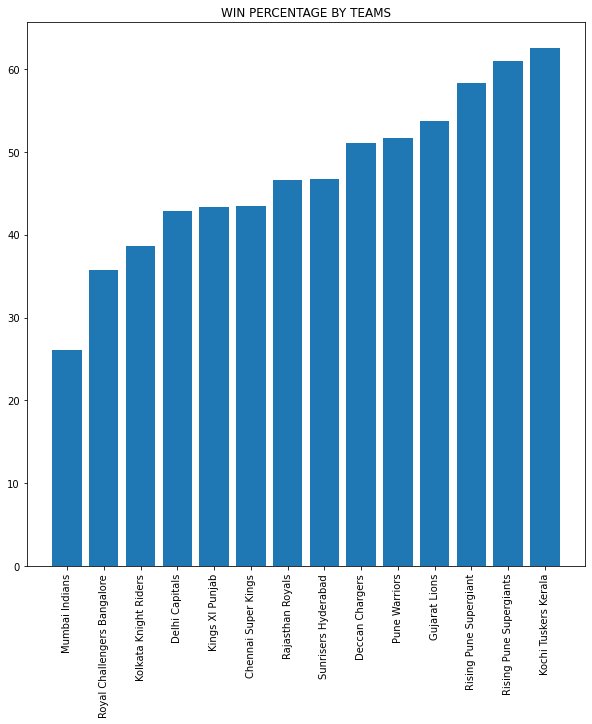

In [769]:
plt.figure(figsize=(10,10))
plt.bar(win_percentage.index,((df1['winner'].value_counts()/ total)*100).sort_values())
plt.xticks(rotation=90)
plt.title('WIN PERCENTAGE BY TEAMS')

In [770]:
last_3=df3[df3['season']>2016]
last_3['winner'].value_counts()

Sunrisers Hyderabad    4
Kings XI Punjab        2
Name: winner, dtype: int64

Text(0, 4, '4')

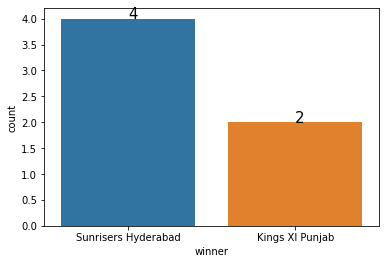

In [771]:
sns.countplot(last_3['winner'],data=last_3)
plt.text(1,2,str(2),fontsize=15)
plt.text(0,4,str(4),fontsize=15)

# QUES 2

In [772]:
df4= df[['match_id','batsman','bowling_team','batsman_runs','ball','over','bowler','player_dismissed','dismissal_kind']]
df4=df4[(df4['batsman'] == 'DA Warner') & (df4['bowling_team'] == 'Kings XI Punjab')]
df4=df4.fillna(0)
df4

,match_id,batsman,bowling_team,batsman_runs,ball,over,bowler,player_dismissed,dismissal_kind
4312,19,DA Warner,Kings XI Punjab,0,1,1,Sandeep Sharma,0,0
4313,19,DA Warner,Kings XI Punjab,0,2,1,Sandeep Sharma,0,0
4314,19,DA Warner,Kings XI Punjab,0,3,1,Sandeep Sharma,0,0
4315,19,DA Warner,Kings XI Punjab,1,4,1,Sandeep Sharma,0,0
4317,19,DA Warner,Kings XI Punjab,0,6,1,Sandeep Sharma,0,0
...,...,...,...,...,...,...,...,...,...
176247,11339,DA Warner,Kings XI Punjab,1,3,15,A Singh,0,0
176250,11339,DA Warner,Kings XI Punjab,1,6,15,A Singh,0,0
176251,11339,DA Warner,Kings XI Punjab,0,1,16,R Ashwin,0,0
176252,11339,DA Warner,Kings XI Punjab,1,2,16,R Ashwin,0,0


In [773]:
df4['player_dismissed'] = df4['player_dismissed'].apply(lambda x: 'NO WICKET'  if x== 0 else 'WICKET')
df4

,match_id,batsman,bowling_team,batsman_runs,ball,over,bowler,player_dismissed,dismissal_kind
4312,19,DA Warner,Kings XI Punjab,0,1,1,Sandeep Sharma,NO WICKET,0
4313,19,DA Warner,Kings XI Punjab,0,2,1,Sandeep Sharma,NO WICKET,0
4314,19,DA Warner,Kings XI Punjab,0,3,1,Sandeep Sharma,NO WICKET,0
4315,19,DA Warner,Kings XI Punjab,1,4,1,Sandeep Sharma,NO WICKET,0
4317,19,DA Warner,Kings XI Punjab,0,6,1,Sandeep Sharma,NO WICKET,0
...,...,...,...,...,...,...,...,...,...
176247,11339,DA Warner,Kings XI Punjab,1,3,15,A Singh,NO WICKET,0
176250,11339,DA Warner,Kings XI Punjab,1,6,15,A Singh,NO WICKET,0
176251,11339,DA Warner,Kings XI Punjab,0,1,16,R Ashwin,NO WICKET,0
176252,11339,DA Warner,Kings XI Punjab,1,2,16,R Ashwin,NO WICKET,0


In [774]:
df4['player_dismissed'].value_counts()

NO WICKET    578
WICKET        17
Name: player_dismissed, dtype: int64

In [775]:
#From above
dismissals_of_Warner_against_vsKXIP=17

In [776]:
df4['dismissal_kind'].value_counts()

0             578
caught         10
run out         4
bowled          2
hit wicket      1
Name: dismissal_kind, dtype: int64

In [777]:
df4['dismissal_kind'].value_counts(normalize=True)

0             0.971429
caught        0.016807
run out       0.006723
bowled        0.003361
hit wicket    0.001681
Name: dismissal_kind, dtype: float64

In [778]:
#From above getting dismissed by caught is more as compared to stumped,run out,bowled

In [779]:
matches_for_Warner_vsKXIP=df4['match_id'].nunique()
matches_for_Warner_vsKXIP

17

In [780]:
Probability_of_getting_dismissed_against_VSKXIP=dismissals_of_Warner_against_vsKXIP/matches_for_Warner_vsKXIP
Probability_of_getting_dismissed_against_VSKXIP

1.0

In [781]:
total_no_of_balls_faced=df4['ball'].value_counts().sum()
total_no_of_balls_faced

595

In [782]:
totalruns_against_vsKXIP=df4['batsman_runs'].sum()
totalruns_against_vsKXIP

833

In [783]:
strikerate=(totalruns_against_vsKXIP/total_no_of_balls_faced)*100
strikerate

140.0

# QUES 3

In [784]:
df5= df[['match_id','bowling_team','batsman','batsman_runs']]
df5=df5[(df5['batsman'] == 'KL Rahul') & (df5['bowling_team'] == 'Sunrisers Hyderabad')]
df5

,match_id,bowling_team,batsman,batsman_runs
142606,603,Sunrisers Hyderabad,KL Rahul,2
142607,603,Sunrisers Hyderabad,KL Rahul,4
142608,603,Sunrisers Hyderabad,KL Rahul,1
142610,603,Sunrisers Hyderabad,KL Rahul,1
142611,603,Sunrisers Hyderabad,KL Rahul,2
...,...,...,...,...
176393,11339,Sunrisers Hyderabad,KL Rahul,0
176394,11339,Sunrisers Hyderabad,KL Rahul,1
176399,11339,Sunrisers Hyderabad,KL Rahul,2
176400,11339,Sunrisers Hyderabad,KL Rahul,1


In [785]:
total_runs_rahul_vsSRH=df5["batsman_runs"].sum()
total_runs_rahul_vsSRH

267

In [786]:
df6= df[['match_id','bowling_team','batting_team','total_runs','extra_runs']]
df6=df6[(df6['batting_team'] == 'Kings XI Punjab') & (df6['bowling_team'] == 'Sunrisers Hyderabad')]
df6

,match_id,bowling_team,batting_team,total_runs,extra_runs
4437,19,Sunrisers Hyderabad,Kings XI Punjab,0,0
4438,19,Sunrisers Hyderabad,Kings XI Punjab,4,0
4439,19,Sunrisers Hyderabad,Kings XI Punjab,0,0
4440,19,Sunrisers Hyderabad,Kings XI Punjab,0,0
4441,19,Sunrisers Hyderabad,Kings XI Punjab,0,0
...,...,...,...,...,...
176407,11339,Sunrisers Hyderabad,Kings XI Punjab,0,0
176408,11339,Sunrisers Hyderabad,Kings XI Punjab,0,0
176409,11339,Sunrisers Hyderabad,Kings XI Punjab,0,0
176410,11339,Sunrisers Hyderabad,Kings XI Punjab,1,0


In [787]:
total_runs_for_KXIP_vsSRH=(df6["total_runs"]-df6["extra_runs"]).sum()
total_runs_for_KXIP_vsSRH

2179

In [788]:
rahul_contribution=(total_runs_rahul_vsSRH/total_runs_for_KXIP_vsSRH)*100
rahul_contribution

12.253327214318494

# QUES 4

In [789]:
df6= df[['match_id','bowling_team','batting_team','total_runs','ball']]
df6=df6[(df6['batting_team'] == 'Sunrisers Hyderabad') & (df6['bowling_team'] == 'Kings XI Punjab')]
df6

,match_id,bowling_team,batting_team,total_runs,ball
4312,19,Kings XI Punjab,Sunrisers Hyderabad,0,1
4313,19,Kings XI Punjab,Sunrisers Hyderabad,0,2
4314,19,Kings XI Punjab,Sunrisers Hyderabad,0,3
4315,19,Kings XI Punjab,Sunrisers Hyderabad,1,4
4316,19,Kings XI Punjab,Sunrisers Hyderabad,1,5
...,...,...,...,...,...
176280,11339,Kings XI Punjab,Sunrisers Hyderabad,1,3
176281,11339,Kings XI Punjab,Sunrisers Hyderabad,2,4
176282,11339,Kings XI Punjab,Sunrisers Hyderabad,4,5
176283,11339,Kings XI Punjab,Sunrisers Hyderabad,1,6


In [790]:
df6.set_index('match_id',inplace=True)

In [791]:
df7=df6.groupby(['match_id','ball']).agg({'total_runs':'cumsum'})
df7

,total_runs
match_id,
19,0
19,0
19,0
19,1
19,1
...,...
11339,35
11339,36
11339,31


In [792]:
df7=df7[(df7['total_runs'] < 51)]
df7

,total_runs
match_id,
19,0
19,0
19,0
19,1
19,1
...,...
11339,35
11339,36
11339,31


In [793]:
df8=df7.count(axis='columns')
df8

match_id
19       1
19       1
19       1
19       1
19       1
        ..
11339    1
11339    1
11339    1
11339    1
11339    1
Length: 1717, dtype: int64

In [794]:
df9= df[['match_id','bowling_team','batting_team','total_runs','ball']]
df9=df9[(df9['batting_team'] == 'Sunrisers Hyderabad') & (df9['bowling_team'] == 'Kings XI Punjab')]
df9


,match_id,bowling_team,batting_team,total_runs,ball
4312,19,Kings XI Punjab,Sunrisers Hyderabad,0,1
4313,19,Kings XI Punjab,Sunrisers Hyderabad,0,2
4314,19,Kings XI Punjab,Sunrisers Hyderabad,0,3
4315,19,Kings XI Punjab,Sunrisers Hyderabad,1,4
4316,19,Kings XI Punjab,Sunrisers Hyderabad,1,5
...,...,...,...,...,...
176280,11339,Kings XI Punjab,Sunrisers Hyderabad,1,3
176281,11339,Kings XI Punjab,Sunrisers Hyderabad,2,4
176282,11339,Kings XI Punjab,Sunrisers Hyderabad,4,5
176283,11339,Kings XI Punjab,Sunrisers Hyderabad,1,6


In [795]:
total_no_of_balls_faced_by_SRH_vsKXIP=df9['ball'].value_counts().sum()
total_no_of_balls_faced_by_SRH_vsKXIP

1717

In [796]:
totalruns_for_SRH_vsKXIP=df9['total_runs'].sum()
totalruns_for_SRH_vsKXIP

2351

In [797]:
#for 50 runs
runs_for_first_50_runs=(50*total_no_of_balls_faced_by_SRH_vsKXIP)/totalruns_for_SRH_vsKXIP
runs_for_first_50_runs

36.516376010208425

# QUES 5

In [798]:
df10= df[['match_id','bowling_team','batsman','batsman_runs','ball']]
df10=df10[(df10['batsman'] == 'CH Gayle') & (df10['bowling_team'] == 'Sunrisers Hyderabad')]
df10

,match_id,bowling_team,batsman,batsman_runs,ball
125,1,Sunrisers Hyderabad,CH Gayle,1,1
131,1,Sunrisers Hyderabad,CH Gayle,0,1
132,1,Sunrisers Hyderabad,CH Gayle,0,2
133,1,Sunrisers Hyderabad,CH Gayle,1,3
137,1,Sunrisers Hyderabad,CH Gayle,0,1
...,...,...,...,...,...
169994,11313,Sunrisers Hyderabad,CH Gayle,1,6
169995,11313,Sunrisers Hyderabad,CH Gayle,0,1
176291,11339,Sunrisers Hyderabad,CH Gayle,4,7
176292,11339,Sunrisers Hyderabad,CH Gayle,0,8


In [799]:
df11=df10.groupby(['match_id','ball']).agg({'batsman_runs':'cumsum'})
df11

,batsman_runs
125,1
131,1
132,0
133,1
137,1
...,...
169994,2
169995,6
176291,4
176292,0


In [800]:
df12= df[['match_id','bowling_team','batsman','batsman_runs','ball']]
df12=df12[(df12['batsman'] == 'CH Gayle') & (df12['bowling_team'] == 'Sunrisers Hyderabad')]
df12

,match_id,bowling_team,batsman,batsman_runs,ball
125,1,Sunrisers Hyderabad,CH Gayle,1,1
131,1,Sunrisers Hyderabad,CH Gayle,0,1
132,1,Sunrisers Hyderabad,CH Gayle,0,2
133,1,Sunrisers Hyderabad,CH Gayle,1,3
137,1,Sunrisers Hyderabad,CH Gayle,0,1
...,...,...,...,...,...
169994,11313,Sunrisers Hyderabad,CH Gayle,1,6
169995,11313,Sunrisers Hyderabad,CH Gayle,0,1
176291,11339,Sunrisers Hyderabad,CH Gayle,4,7
176292,11339,Sunrisers Hyderabad,CH Gayle,0,8


In [801]:
total_no_of_balls_faced_by_Gayle_vsSRH=df12['ball'].value_counts().sum()
total_no_of_balls_faced_by_Gayle_vsSRH

261

In [802]:
totalruns_for_Gayle_vsSRH=df12['batsman_runs'].sum()
totalruns_for_Gayle_vsSRH

384

In [ ]:
#for first 10 balls
runs_for_first_10_balls=(10*totalruns_for_Gayle_vsSRH)/total_no_of_balls_faced_by_Gayle_vsSRH
runs_for_first_10_balls